# **Crop Prediction**

## **Objective**
> Life on the farm is tiring and full of effort because a lot of tasks have to be done within the day to achieve the ultimate goal, for example, transplanting seedlings, checking the crops for insects or beetles, checking on their livestock, and many more. However, hard-working is not the only factor that influences production and the rate of return. Choosing the right types of the crop remains equally important.

>Different crops need a different type of soils, different types and amounts of nutrients, and different types and amounts of water. By selecting the right crop for the given soil conditions and climate, one can optimise yields and save water requirements for irrigation.

>When a farmer would like to know what kind of crops grow well, they could place sensors in the soil that measure the concentration of various chemicals, and the local weather station delivers accurate information on the current temperature, humidity and average rainfall. There is also some related dataset that shows for many combinations of these values what kind of crop would grow well. Obviously, it would be very laborious to look up these values in the large table and it’s easy to make an unreliable decision without a great deal of experience about it. Ideally, the computer would do this. In other words, given data from the sensors on the farm, the farmers will get a recommendation for crops, from the computer that should grow well.

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## **Data Source** : [Kaggle](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset)



> **Context**

Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.



> **Data fields**

*   N - ratio of Nitrogen content in soil
*   P - ratio of Phosphorous content in soil
*   K - ratio of Potassium content in soil
*   temperature - temperature in degree Celsius
*   humidity - relative humidity in %
*   ph - ph value of the soil
*   rainfall - rainfall in mm



## **Importing Data**

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/ethereal-k/ML-Crop-recommendation/main/Crop_recommendation.csv')

## **Data Preprocessing**


In [ ]:
df.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df.rename(columns={'N':'nitrogen','P':'phosphorus','K':'potassium','label':'crop'}, inplace=True)
df.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.isnull().sum()

nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [ ]:
crop_names = df['crop'].unique()
print(crop_names)
print(df['crop'].unique().shape)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
(22,)


In [ ]:
df['crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

### **Smoothening noisy data**

**Defining Target variable(y) and Feature variable(X)**

In [ ]:
features = ['nitrogen','phosphorus','potassium','temperature','humidity','ph','rainfall']
target = ['crop']
X = df[features]
y = df[target]

### **Train** **Test** **Split**

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=555)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1650, 7), (550, 7), (1650, 1), (550, 1))

### **Data Transformation**

**Encoding**

In [ ]:
 df2=y_train
le = LabelEncoder()
y_train = le.fit_transform(np.asarray(y_train).ravel())
y_test = le.fit_transform(np.asarray(y_test).ravel())

**Feature Scaling**

In [ ]:
for ii, col in enumerate(features):
  print('{} (min,max): \t \t {:.2f} {:.2f}'.format(col,df[col].min(),df[col].max()))

nitrogen (min,max): 	 	 0.00 140.00
phosphorus (min,max): 	 	 5.00 145.00
potassium (min,max): 	 	 5.00 205.00
temperature (min,max): 	 	 8.83 43.68
humidity (min,max): 	 	 14.26 99.98
ph (min,max): 	 	 3.50 9.94
rainfall (min,max): 	 	 20.21 298.56


In [ ]:
mmscaler = MinMaxScaler() 
X_train_features = mmscaler.fit_transform(X_train)
X_test_features = mmscaler.transform(X_test)

In [ ]:
for ii, col in enumerate(features):
  print('{} (min,max): \t \t {:.2f} {:.2f}'.format(col,X_train_features[:,ii].min(),X_train_features[:,ii].max()))

nitrogen (min,max): 	 	 0.00 1.00
phosphorus (min,max): 	 	 0.00 1.00
potassium (min,max): 	 	 0.00 1.00
temperature (min,max): 	 	 0.00 1.00
humidity (min,max): 	 	 0.00 1.00
ph (min,max): 	 	 0.00 1.00
rainfall (min,max): 	 	 0.00 1.00


## **Modelling**

**Using Random Forest Classification**

In [ ]:
model = RandomForestClassifier(random_state=555)
# fit the model to the training data 
model.fit(X_train,y_train)

RandomForestClassifier(random_state=555)

### **Prediction**

In [ ]:
y_pred=model.predict(X_test)
print(y_pred.shape)
print(y_pred)

(550,)
[ 6 15  1 12 21  4  7  9 13 16  6 10  5 11  9 20  8 15  4 17 16  5  2  0
  6 14 20 21 11 12  5  5  0 12 18  4  5  1 20 13  0 17  3  8 14  7  8 17
  4  6  9 17  1  4  9 16 21 21 14 10  6  9 14 20  2  4  8  8  2 11  3  1
 15  0  0 10 11 17 20 11 10  5  6 14  6 16  7  2  1 16 15 21 20 10 11  3
  3 20  9  8 18 20 14  0  4  9  6 16  6 13  1 12 11  4  3  8  4  1 20  1
 11  7  5 21  9  6  9 10 18 21 21 21  1 16 19 13 17 21 13 17 14 11  2 20
 21 20 16  0 16 14 19 10 18 18  3  4 21  3 17  8 18  3  0 10 13 20 18  3
 16 14  0  5 17  1 13 17 15  4 19 14 15  0 11  4 15 16 20 16 10  6 15 13
 18 20 10  2 14  8  5 10  9  3  4  5  8 15  5  7 14 14 19 19 10  8 11  8
  2 17  3  3 20  7 10 18  5  3  5 19 20 13 14  0 14 17  2  8 21 19  8 17
 10 18 10 10 21  6 12  9  2  3 16  8  9  1  4  1 13  7 20  7 15  2 11 17
  7 11 18  0 15  0 11  7 21 12 11  5  9  0 11 17  2  3 21 12 11 11 11 11
 13 21  1  6 14  2  9 19 16 12 10 13  1 14 11 19 16  3  9 12  4  2 17 19
  1 19  6  5  9  6  4  7 10  7  9 19  0 10  

### **Probablity of Predicted class**

In [ ]:
y_probab = model.predict_proba(X_test)
y_predict_probablity = pd.DataFrame(y_probab)
y_predict_probablity



,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.00,0.00,0.00,0.0,0.0,0.00,1.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
1,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.98,0.00,0.00,0.00,0.00,0.0,0.02
2,0.00,1.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
3,0.00,0.00,0.01,0.0,0.0,0.02,0.0,0.00,0.0,0.0,...,0.5,0.13,0.0,0.00,0.01,0.00,0.30,0.00,0.0,0.00
4,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.99,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.01,0.00,0.00,0.0,0.00
546,0.01,0.00,0.00,0.0,0.0,0.00,0.0,0.99,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
547,0.93,0.00,0.00,0.0,0.0,0.00,0.0,0.05,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.00,0.01,0.01,0.0,0.00
548,0.00,0.01,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.99


## **Evaluation**

In [ ]:
print('Training Accuracy: {:.2f}%, Test Accuracy: {:.2f}%'.format(metrics.accuracy_score(y_train,model.predict(X_train))*100,metrics.accuracy_score(y_test,model.predict(X_test))*100))

Training Accuracy: 100.00%, Test Accuracy: 99.45%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [ ]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        21
           8       0.96      0.96      0.96        26
           9       1.00      1.00      1.00        25
          10       1.00      0.97      0.98        30
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        26
          13       0.95      1.00      0.98        21
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        27
          17       1.00    

## **Visualization**

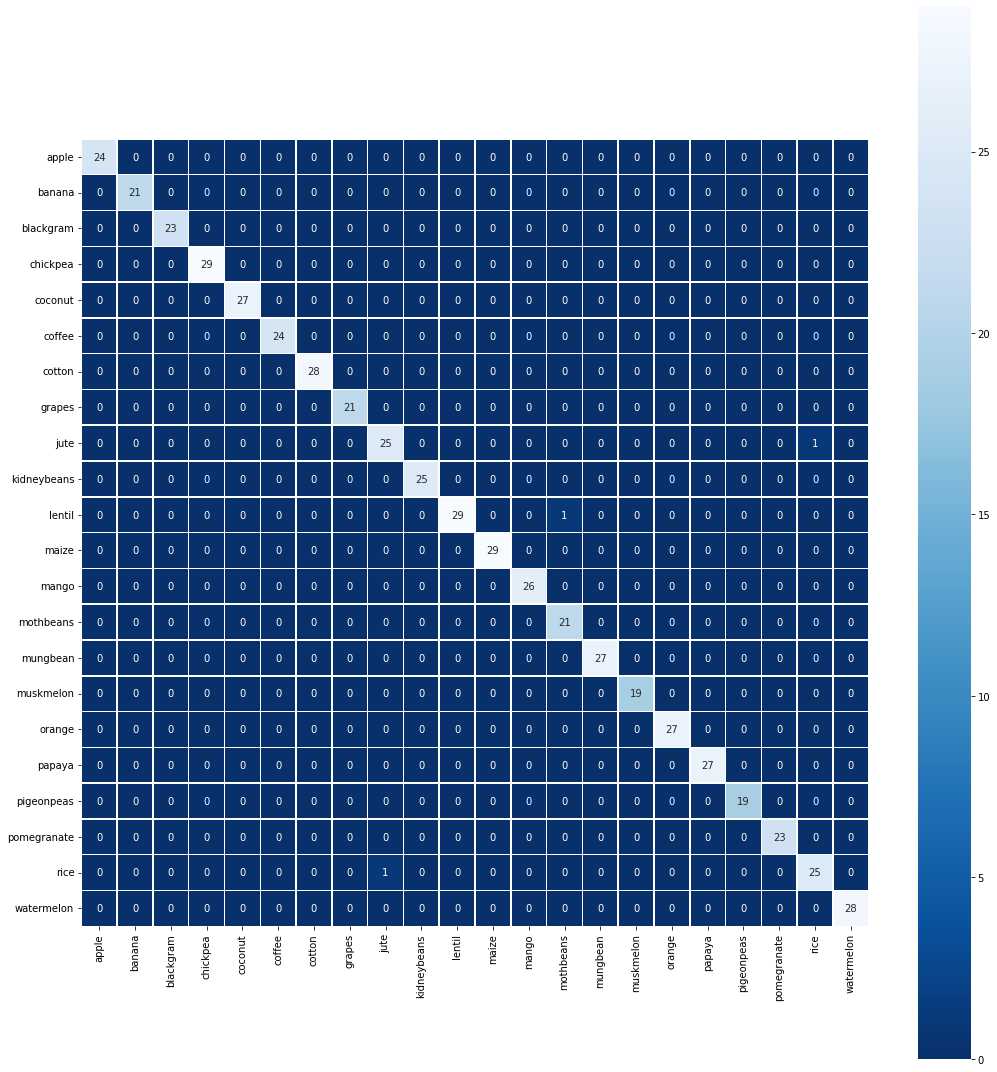

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,y_test),square=True,cmap='Blues_r',annot=True,fmt=".0f",linewidths=.5)
ax = plt.gca()
cropnamesa=sorted(crop_names)
_ = ax.set_xticklabels(cropnamesa,rotation='vertical')
_ = ax.set_yticklabels(cropnamesa,rotation='horizontal')
plt.tight_layout()
plt.show()

## **Explanation**

> Data Preprocessing

 1. Appropriate labels were introduced.
 2. No null values were found, so data cleaning was not needed.
 3. Crop was set as feature variable, rest were set as target varables.
 4. 75% of the data was used for training and 25% for testing.
 5. Features were scaled between range of 0-1 using min-max scalar and Labels were encoded using label encoder.


> Modelling

Random forest classification was used for modelling.

>Prediction 

Preduction was made for test features.

>Probablity

Probablity of test features giving diffrent classes was also found.

>Evaluation 

Evalution was made using sklearn.metrics.accuracy_score() method, confusion matrix and metrics.classification_report() method which showed that model is working fine.

>Visualization

Visualization of confusion matrix was done.
